# Function definitions

In [6]:
def prep_db(file,file_type):
    '''
    This module reads and prepares the db : cleans,
    deletes the columns with 'Unnamed' values,
    fills NaN values
    input : 
    file # the movieset file
    file type # csv file type
    output :
    df # read movie set dataframe 
    '''
    if file_type == 'csv':
        df = pd.read_csv(file, sep=';', dtype=str) # Read CSV File    
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.fillna('') # clean the data - get rid of NaN
    df = df.astype(str) # change the default data type to string
    return(df)

def combine_row_text(features,df):
    '''
    This module combines text columns and sets the case of the combined text to lower
    args :
    input : 
    features # list of database columns to search in the movies database
    df # pandas dataframe
    output : counts # dataframe
    '''
    df['comb'] = ''
    for feature  in features:
        df['comb']= df['comb'].str.cat(df[feature].copy(), sep =',')
    df['comb'] = df['comb'].str.lower()
    return(df)

def highest_count_words(df):
    '''
    This module takes as input the imported movie dataset 
    and counts the occurance of the words and
    sets the columns in decreasing order
    args :
    input : df # pandas dataframe of the imported movie dataset
    output : counts # dataframe of the counted words
    '''
    
    count_matrix = vectorizer.fit_transform(df.keywords)
    count_matrix = count_matrix.astype(np.int32)
    counts = pd.DataFrame(count_matrix.toarray(),
                      index=df.title,
                      columns=vectorizer.get_feature_names())
    return(counts)

def find_delete_columns(counts,character,char): 
    '''
    This module is run off of the delete columns mega
    and deletes the unwanted columns of words
    args :
    input : 
    counts # dataframe of column of counted words
    character # regex code for the particular character(s)
    char # the unwanted character(s) that I want deleted
    output :
    counts # dataframe without the unwanted characters
    '''
    t = 0 # column counter
    n = 1
    orig = len(counts.columns)
    #print(' ')
    #print(' ')
    #print(f'Original column count is {len(counts.columns)}')
    print(f'removing {char} .... ')
    for i in counts.columns:
        if t == (n * 1000):
            # print(str(round(t/len(counts.columns)*100,0))+'%')
            n +=1
        t+=1
        if re.findall(character, i):
            del counts[i]
    #print(f'after deleting the unwanted word -{char}-, the list is {len(counts.columns)} long')
    #print(f'Reduction effectiveness : {str(round((1-(len(counts.columns)/orig))*100,0))} %')
    return(counts)

def delete_columns_mega(counts):                   
    '''
    This module calls the sub module and controls the deletion of unwanted columns
    input : 
    counts # dataframe of column of counted words
    output :
    counts # dataframe without the unwanted characters    
    '''
    counts = find_delete_columns(counts, '\d', 'any numeric')
    counts = find_delete_columns(counts, '[\uac00-\ud7a3]', 'Korean characters')
    counts = find_delete_columns(counts, '[\u4e00-\u9FFF]', 'Chinese characters')
    counts = find_delete_columns(counts, '[\u0900-\u097F]',' Indian characters')
    counts = find_delete_columns(counts, '[\u0627-\u064a]',' Arabic characters')
    counts = find_delete_columns(counts, '[\u0400-\u04FF]',' Russian characters')
    counts = find_delete_columns(counts, '[\u0370-\u03FF]',' Greek characters')
    counts = find_delete_columns(counts, '[\u3040-\u30FF]',' Japanese Katagana characters')
    counts = find_delete_columns(counts, '[\u3040-\u309F]',' Japanese Hiragana characters')
    counts = find_delete_columns(counts, '[\u3040-\u30FF]',' Japanese Katagana characters')
#     counts = find_delete_columns(counts, '(^has$)',' has')
#     counts = find_delete_columns(counts, '(^time$)',' time')
#     counts = find_delete_columns(counts, '(^never$)',' never')
#     counts = find_delete_columns(counts, '(^director$)',' director')
#     counts = find_delete_columns(counts, '(^john$)',' john')
#     counts = find_delete_columns(counts, '(^and$)',' and')
#     counts = find_delete_columns(counts, '(^will$)',' will')
#     counts = find_delete_columns(counts, '(^you$)',' you')
#     counts = find_delete_columns(counts, '(^they$)',' they')
#     counts = find_delete_columns(counts, '(^is$)',' is')
#     counts = find_delete_columns(counts, '(^film$)',' film')
#     counts = find_delete_columns(counts, '(^it$)',' it')
#     counts = find_delete_columns(counts, '(^one$)',' one')
#     counts = find_delete_columns(counts, '(^its-?$)',' it,its')
#     counts = find_delete_columns(counts, '(^of$)',' of')
#     counts = find_delete_columns(counts, '(^on$)',' on')
#     counts = find_delete_columns(counts, '(^for$)',' for')
#     counts = find_delete_columns(counts, '(^the$)',' the')
#     counts = find_delete_columns(counts, '(^to$)',' to')
#     counts = find_delete_columns(counts, '(^your-?$)',' you,your')
#     counts = find_delete_columns(counts, '(^new$)',' new')
#     counts = find_delete_columns(counts, '(^man$)',' man')
#     counts = find_delete_columns(counts, '(^woman$)',' woman')
#     counts = find_delete_columns(counts, '(^no$)',' no')
#     counts = find_delete_columns(counts, '(^his$)',' his')
#     counts = find_delete_columns(counts, '(^he$)',' he')
#     counts = find_delete_columns(counts, '(^hers$)',' hers')
#     counts = find_delete_columns(counts, '(^can$)',' can')
#     counts = find_delete_columns(counts, '(^all$)',' all')
#     counts = find_delete_columns(counts, '(^from$)',' from')
#     counts = find_delete_columns(counts, '(^are$)',' are')
#     counts = find_delete_columns(counts, '(^there$)',' there')
#     counts = find_delete_columns(counts, '(^an$)',' an')
#     counts = find_delete_columns(counts, '(^with$)',' with')
#     counts = find_delete_columns(counts, '(^in$)',' in')
#     counts = find_delete_columns(counts, '(^be$)',' be')
#     counts = find_delete_columns(counts, '(^what$)',' what')
    return (counts)

def most_frequent_words(counts):
    '''
    This module prepares the most frequent words of the 
    specific movie's selection types and ouputs to a csv
    input : 
    counts # dataframe of column of counted words
    output :
    counts_transposed # column transferred to rows
    and saved to a csv
    '''
    counts_transposed = counts.T
    counts_transposed['sum'] = counts_transposed.sum(axis=1)
    cols = counts_transposed.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    counts_transposed = counts_transposed.astype(np.int32)
    counts_transposed = counts_transposed[cols]
    counts_transposed = counts_transposed.sort_values(by=['sum'], axis=0, ascending=False)
    movie_counts = counts_transposed
    most_frequent_words = counts_transposed[['sum']]
    most_frequent_words = most_frequent_words.reset_index()
    most_frequent_words = most_frequent_words.rename(columns={'index': 'word', 'sum':'frequency'}, index={'title': 'index'})
    return(most_frequent_words,counts_transposed)

def cloud_word(word,nr_of_movies,movie_counts):
    var = word
    df = movie_counts.T[[var]]
    return(df.sort_values(var, ascending=False).head(nr_of_movies))

def make_pandas(freq_words,nr_of_movies,movie_counts):
    '''
    '''
    word_list = freq_words['word']
    word_list = word_list.tolist()
    t = 0
    for i in word_list:
        movies = cloud_word(i,nr_of_movies,movie_counts)
        movies = movies[1:]
        movies = movies.reset_index()
        movies = pd.DataFrame(data=movies)
        movies = movies.rename(columns={'title':i})
        movies = movies.iloc[:, :-1]
        if t == 0:
            df1 = movies
        elif t> 1:
            df1 = pd.concat([df1,movies],axis=1)
        t+=1
    return(df1)
        
def word_cloud(wrds):
    '''
    The function is the word cloud generator
    Input : colunms of title and keywords of words and
    groups of words from the db.
    Output : the word cloud graphic 
    '''
    print(wrds)
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = stopwords,
                    random_state = None,
                    min_font_size = 15).generate(','.join(wrds)) 
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.savefig(MAIN_FOLDER + MWML_FOLDER + 'word_cloud_graphic.png')
    plt.tight_layout(pad = 0) 
    plt.show()

# Import and main functions

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pathlib
import requests
import re
import psutil
#import openpyxl

vectorizer = CountVectorizer(stop_words='english')
'''
Imports the 44,000 movie database into a pandas df so you can retrieve the columns.
There are 24 columns in the database ranging from keywords to director.
'''
# Load the dataframe
MAIN_FOLDER = 'c:/Users/champ/Python_proj/'
MWML_FOLDER = 'made_with_ml_repo/temp/moviebuddy/meta_data/'
#FILE = "movies_database_cleaned_from_made_with_ml.csv"
FILE = "filtered.csv"

df = prep_db(MAIN_FOLDER + MWML_FOLDER + FILE,'csv')
#df = df[['title', 'director', 'tagline', 'genres', 'keywords']]
df = df[['title','keywords']]

#df = df.head(38000)
df['keywords'] = df['keywords'].str.replace(', ', ',')
df['keywords'] = df['keywords'].str.replace('\s', '_')
print('The selection types are : ')
print(df.info())

print(f'RAM = {psutil.virtual_memory().percent}')

# Main functions
counts = highest_count_words(df) # counts all the individual words in the title and the keywords
frequent_words,movie_counts = most_frequent_words(counts) # organizes the word count
print(display(frequent_words.head(10)))
movies = make_pandas(freq_words = frequent_words.head(50),nr_of_movies = 10,movie_counts = movie_counts)
movies.to_csv (MAIN_FOLDER + MWML_FOLDER + 'word_cloud_movie_recommendations.csv', index = False, header=True, sep=';')

# # This function cleans the database of unwanted words like "the" , "an" , other misc lanaguage characters, etc)  
# counts = delete_columns_mega(counts)




The selection types are : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45416 entries, 0 to 45415
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     45416 non-null  object
 1   keywords  45416 non-null  object
dtypes: object(2)
memory usage: 709.8+ KB
None
RAM = 78.0


title,word,frequency
0,woman_director,3038
1,independent_film,1914
2,murder,1285
3,based_on_novel,822
4,musical,726
5,sex,684
6,violence,647
7,nudity,629
8,revenge,618
9,biography,613


None


# Word cloud

0                       superhero,lego
1        nature,science,canadian_movie
2                    vietnam_war,short
3                                     
4                      stand-up_comedy
                     ...              
45411                                 
45412          blacksmith,beer,workmen
45413                            short
45414               dancer,silent_film
45415                                 
Name: keywords, Length: 45416, dtype: object


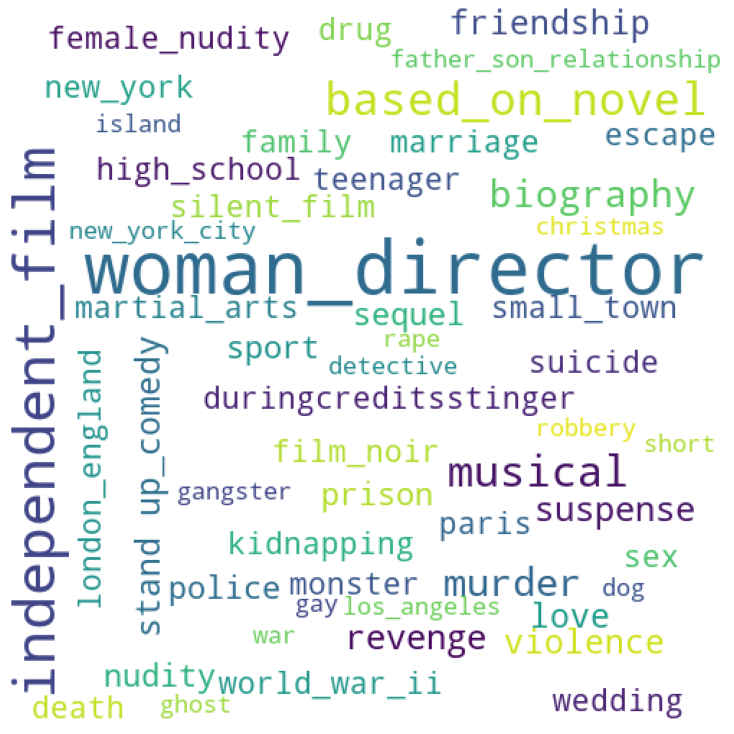

In [8]:
'''
A word cloud is generated here based on the occurance of keyword words
'''
#word_cloud(df['keywords'])
word_cloud(df['keywords'])


In [9]:
movies

,woman_director,murder,based_on_novel,musical,sex,violence,nudity,revenge,biography,suspense,...,gay,marriage,christmas,death,gangster,gore,zombie,small_town,detective,london_england
0,tt1984110|Among Friends,tt0069421|Your Vice is a Locked Room and Only ...,tt1995390|Our Kind of Traitor,tt0040976|Words and Music,tt0443496|Edmond,tt0244244|Swordfish,tt0077270|The Boys in Company C,tt2073661|Stranded,tt0046564|Young Bess,tt0065677|Forbidden Photos of a Lady Above Sus...,...,tt0889583|Brüno,tt0376006|Book of Love,tt0107471|My Favorite Season,tt0872022|Heavenly Forest,tt3569230|Legend,tt2944198|Backcountry,tt0378417|Night of the Living Dorks,tt0093225|Housekeeping,tt0093723|Perry Mason: The Case of the Murdere...,tt1821694|RED 2
1,tt0147590|Tattooed Tears,tt0069007|The Nightcomers,tt0068496|Don Quijote cabalga de nuevo,tt0041687|Neptune's Daughter,tt0328077|Love Object,tt0867334|Jolene,tt0077247|Bloodsucking Freaks,tt0246677|Heaven,tt3210686|Son of God,tt0073747|The Stepford Wives,...,tt0250478|Nico and Dani,tt0021060|Let Us Be Gay,tt5739680|A December Bride,tt0021542|Westfront 1918,tt0104427|Hoffa,tt0059079|Come Drink with Me,tt1838571|Juan of the Dead,tt3919218|How to Plan an Orgy in a Small Town,tt0086407|Secret of the Blackbirds,tt0071807|The Man with the Golden Gun
2,"tt1638979|Hey, Boo: Harper Lee & To Kill a Moc...",tt0069019|Don't Torture a Duckling,tt0068492|Claude Chabrol's High Heels,tt0041604|Love Happy,"tt0106579|Clean, Shaven",tt0095016|Die Hard,tt0077191|To Be Twenty,tt0065997|A Long Ride from Hell,tt3228360|Yalom's Cure,tt0073679|Special Section,...,tt0065656|Dorian Gray,tt0101640|Raise the Red Lantern,tt1572008|A Nanny for Christmas,tt1075747|Jonah Hex,tt1674775|Keyhole,tt0059044|Color Me Blood Red,tt0071256|The Ghost Galleon,tt4397382|LasseMajas detektivbyrå - Stella Nostra,tt0037826|The Jade Mask,tt0191037|Circus
3,tt1982113|Gerhard Richter Painting,tt0069024|Nothing But the Night,tt0068415|Seven Dead in the Cat's Eye,tt0041515|It's a Great Feeling,tt0106453|Body of Evidence,tt0071628|House of Whipcord,tt0077189|Avalanche,tt0109579|Death and the Maiden,tt0045992|The Lawless Breed,tt1767272|388 Arletta Avenue,...,tt0372122|Adam & Steve,tt0058770|The Marriage of Balzaminov,tt0041473|Holiday Affair,tt0375210|White Noise,tt3569782|Jigarthanda,tt0058694|Two Thousand Maniacs!,tt1220634|Resident Evil: Afterlife,tt0037099|The Mummy's Ghost,tt0048960|Around the World in Eighty Days,tt0034923|Journey for Margaret
4,tt1639084|Tallulah,tt0069121|Prime Cut,tt1951264|The Hunger Games: Catching Fire,tt0405022|House of Boys,tt1702016|We the Party,tt0117883|Thesis,tt0077188|Hitch Hike,tt0087805|Ninja III: The Domination,tt0123865|Gia,tt1767382|Silent House,...,tt1235414|Boys Love,tt0058745|Where Love Has Gone,tt0491722|Meet The Santas,tt0254872|Wishmaster 4: The Prophecy Fulfilled,tt0045780|Forbidden,tt0844479|The Collector,tt0071431|The Living Dead at Manchester Morgue,tt0045920|It Came from Outer Space,tt0105124|Perry Mason: The Case of the Fatal F...,tt0374277|Touch of Pink
5,tt0101444|Big Girls Don't Cry... They Get Even,tt1891974|Ace Attorney,tt0068286|Bless the Beasts & Children,tt0041507|In the Good Old Summertime,tt0091060|Flodder,tt2082152|13 Eerie,tt0466399|Ten Canoes,tt0310357|Willard,tt0045886|Houdini,tt0073586|Psychic Killer,...,tt0138414|Edge of Seventeen,"tt1436559|Love, Wedding, Marriage",tt0107688|The Nightmare Before Christmas,tt0101692|Death in Brunswick,tt0093015|Dragons Forever,tt2393827|Howl,tt0094961|Dead Heat,tt0081414|Resurrection,tt0331632|Scooby-Doo 2: Monsters Unleashed,tt0480011|Straightheads
6,tt0073166|India Song,tt1891923|The Hoarder,tt1966385|City of Tiny Lights,tt0160429|The King and I,tt0106539|Chained Heat 2,tt0109303|Blown Away,tt0119506|Lawn Dogs,tt0117891|A Thin Line Between Love and Hate,tt3263904|Sully,tt0073540|Picnic at Hanging Rock,...,tt0138487|Head On,tt0111054|Safe Passage,tt0104431|Home Alone 2: Lost in New York,tt0095125|Faceless,tt0491244|Election 2,tt0821470|The City of Violenc

In [10]:
movie_counts

title,sum,tt7158814|LEGO DC Super Hero Girls: Brain Drain,tt7104950|The Truth Is in the Stars,tt7078926|Firebase,tt7078780|Zygote,tt7068896|Chris D'Elia: Man on Fire,tt7044010|Rory Scovel Tries Stand-Up for the First Time,tt6990734|Rakka,"tt6987652|Oh, Hello: On Broadway",tt6980792|Queerama,...,tt0000029|Baby's Meal,tt0000023|Baignade en Mer,tt0000014|Tables Turned on the Gardener,tt0000012|The Arrival of a Train at La Ciotat,tt0000010|Workers Leaving the Lumière Factory,tt0000008|Edison Kinetoscopic Record of a Sneeze,tt0000005|Blacksmith Scene,tt0000003|Poor Pierrot,tt0000001|Carmencita,0|The Winner
woman_director,3038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
independent_film,1914,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
murder,1285,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
based_on_novel,822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
musical,726,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jackalope,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jacobs_ladder,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jacques_prevert,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jade,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
